In [184]:
    import numpy as np
    import math
    from datetime import timedelta
    from operator import attrgetter
    from netCDF4 import Dataset
    from netCDF4 import MFDataset
    from collections import defaultdict
    from gpxpy.geo import haversine_distance as havd
    import xarray as xr
    import pandas as pd
    import matplotlib.pyplot as plt   
    import matplotlib.gridspec as gridspec
    from mpl_toolkits.basemap import Basemap
    import seaborn as sns
    import os

In [185]:
#showing graphs within Python
%matplotlib inline
sns.set() # to make graphs look better

In [186]:
'''
Written by Chad Valencia, chadvalencia@gmail.com

for David Lindo Atichati, PhD, CUNY

This is a visualization of stats for cyclonic and anticyclonic eddies.

'''

'\nWritten by Chad Valencia, chadvalencia@gmail.com\n\nfor David Lindo Atichati, PhD, CUNY\n\nThis is a visualization of stats for cyclonic and anticyclonic eddies.\n\n'

In [187]:
#cdf and adf are dataframes complied through the ETL notebook.
cdf = pd.read_csv('./data/cdf.csv')
adf = pd.read_csv('./data/adf.csv')

#adist and cdist are for the nonlinearity calculation

adist = pd.read_csv('./data/adist.csv')
cdist = pd.read_csv('./data/cdist.csv')



In [188]:
'''
the following steps will create a python dictionary of cyclonic eddies by track number
where values of each eddy are the central longitude and latitude for each eddy
throughout the life cycle of the eddy.
'''

'\nthe following steps will create a python dictionary of cyclonic eddies by track number\nwhere values of each eddy are the central longitude and latitude for each eddy\nthroughout the life cycle of the eddy.\n'

In [189]:
c_eddy=defaultdict(list)

In [190]:
#pandas function, populating the empty c_eddy list with coordinates
cdist.apply(lambda row: c_eddy[row['eddy']].append([row['lat'],row['lon']]), axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
157688    None
157689    None
157690    None
157691    None
157692    None
157693    None
157694    None
157695    None
157696    None
157697    None
157698    None
157699    None
157700    None
157701    None
157702    None
157703    None
157704    None
157705    None
157706    None
157707    None
157708    None
157709    None
157710    None
157711    None
157712    None
157713    None
157714    None
157715    None
157716    None
157717    None
Length: 157718, dtype: object

In [191]:
#creating a similar dictionary for anticylconic eddies
a_eddy=defaultdict(list)
adist.apply(lambda row: a_eddy[int(row['eddy'])].append([row['lat'],row['lon']]), axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
128356    None
128357    None
128358    None
128359    None
128360    None
128361    None
128362    None
128363    None
128364    None
128365    None
128366    None
128367    None
128368    None
128369    None
128370    None
128371    None
128372    None
128373    None
128374    None
128375    None
128376    None
128377    None
128378    None
128379    None
128380    None
128381    None
128382    None
128383    None
128384    None
128385    None
Length: 128386, dtype: object

In [192]:
#testing a_eddy
a_eddy[1][0], a_eddy[1][-1]

([16.711275100708008, 201.7930145263672],
 [16.65199089050293, 201.3523101806641])

In [193]:
def initialfinal(df):
    eddy_dict=defaultdict(list)
    df.apply(lambda row: eddy_dict[int(row['eddy'])].append([row['lat'],row['lon']]), axis=1)
    ed = []
    lat_0 = []
    lat_f = []
    lon_0 = []
    lon_f = []
    for k, v in eddy_dict.items():
        ed.append(k)
        lat_0.append(v[0][0])
        lon_0.append(v[0][1])
        lat_f.append(v[-1][0])
        lon_f.append(v[-1][1])
    print(len(lat_0),len(lat_f),len(lon_0),len(lon_f))
    dfs = df.groupby('eddy') #creates a dataframe to make a heatmap for radius and amplitude for each bin
    newdf = dfs.agg({
        'date':'count',
        'u':'mean'
    })
    newdf['eddy']=ed
    newdf['lat_0']=lat_0
    newdf['lat_f']=lat_f
    newdf['lon_0']=lon_0
    newdf['lon_f']=lon_f
    return newdf

In [194]:
c_nonlin = initialfinal(cdist) 
a_nonlin = initialfinal(adist)

9026 9026 9026 9026
7803 7803 7803 7803


In [195]:
#removing eddies of date = 1 (to eliminate error when computing c)
c_nonlin = c_nonlin[c_nonlin['date'] > 1]
a_nonlin = a_nonlin[a_nonlin['date'] > 1]



In [196]:
def c(lat1,lat2,lon1,lon2,days):
    '''
    finds the 'as the crow flies' distance between two latitude, longitude pairs
    '''
    #converting lat,lon to radians
    if days > 1:
        spd = havd(lat1,lon1,lat2,lon2)/(days-1)
        cms = spd*(1/864) #need to multiply cms to change m/day to cm/s
        return cms
    else:
        return 0

In [197]:
c_nonlin['c']=c_nonlin.apply(lambda row: c(row['lat_0'],row['lat_f'],row['lon_0'],row['lon_f'],row['date']), axis=1)
c_nonlin['dist']=c_nonlin.apply(lambda row: havd(row['lat_0'],row['lon_0'],row['lat_f'],row['lon_f']), axis = 1)
a_nonlin['c']=a_nonlin.apply(lambda row: c(row['lat_0'],row['lat_f'],row['lon_0'],row['lon_f'],row['date']), axis=1)
a_nonlin['dist']=a_nonlin.apply(lambda row: havd(row['lat_0'],row['lon_0'],row['lat_f'],row['lon_f']), axis = 1)

In [198]:
c_nonlin['nonlin'] = c_nonlin['u']/c_nonlin['c']
a_nonlin['nonlin'] = a_nonlin['u']/a_nonlin['c']

c_nonlin.to_csv('./data/c_nonlin.csv')
a_nonlin.to_csv('./data/a_nonlin.csv')

c_nonlin = pd.read_csv('./data/c_nonlin.csv')
a_nonlin = pd.read_csv('./data/a_nonlin.csv')

In [199]:
c_nonlin.describe()

,eddy,date,u,eddy.1,lat_0,lat_f,lon_0,lon_f,c,dist,nonlin
count,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8.902000e+03,8902.000000
mean,5074.395978,17.703213,0.141692,5074.395978,25.299026,25.230373,193.395701,193.134524,6.725253,6.801193e+04,0.046594
std,2914.462923,23.634975,0.091175,2914.462923,5.388644,5.348256,9.812546,9.797135,7.160131,9.002689e+04,0.185772
min,1.000000,2.000000,0.015821,1.000000,15.921310,15.920351,176.040161,176.041824,0.008144,1.477647e+02,0.000351
25%,2565.250000,5.000000,0.075806,2565.250000,20.784410,20.790842,185.057125,184.811642,2.703404,1.851866e+04,0.013850
50%,5071.000000,9.000000,0.120203,5071.000000,25.300051,25.196425,193.541222,193.308357,4.721824,4.019325e+04,0.025548
75%,7615.750000,20.000000,0.183244,7615.750000,30.040694,29.973363,202.087784,201.806099,8.177326,8.653028e+04,0.047692
max,10115.000000,462.000000,0.862484,10115.000000,34.040352,34.040359,209.033829,209.033936,135.988646,2.117477e+06,15.120481


In [200]:
def agg(df):
    #aggregating df by eddy to get statistics not found in *_nonlin
    dfs = df.groupby('eddy') #creates a dataframe to make a heatmap for radius and amplitude for each bin
    newdf = dfs.agg({
        'date':'count',
        'radius':np.mean,
        'amplitude':np.mean
    })
    return newdf
    
c_agg = agg(cdf)
a_agg = agg(adf)

In [201]:
c_agg

,date,radius,amplitude
eddy,,,
1.0,4,20.287500,0.601725
2.0,32,32.389063,4.398074
3.0,18,38.450000,0.914883
4.0,10,31.240000,0.921568
5.0,61,106.253279,5.381142
6.0,13,29.442308,1.002135
7.0,19,60.576316,3.571416
8.0,8,25.406250,0.635112
9.0,9,25.661111,0.500599


In [202]:

x1 = []
c_agg['week']=(c_agg['date']/7)
a_agg['week']=(a_agg['date']/7)
x1lab=['Eddy Lifetime (Weeks)','Number of Eddies/Year','Ratio CC/AC']

x1.append(c_agg['week'])
x1.append(a_agg['week'])

x2 = []
x2.append(c_agg['radius'])
x2.append(a_agg['radius'])
x2lab=['Radius (km)','Number of Eddies/Year','Ratio CC/AC']

x3 = []
x3.append(c_agg['amplitude'])
x3.append(a_agg['amplitude'])
x3lab=['Amplitude (cm)','Number of Eddies/Year','Ratio CC/AC']

x4 = []
cnl = c_nonlin
anl = a_nonlin
x4.append(cnl['nonlin'])
x4.append(anl['nonlin'])
x4lab=['Nonlinearity','Number of Eddies/Year','Ratio CC/AC']


#setting weights to .2 to show eddies per year vs eddies per 5 years
weight_c = .2*np.ones(len(c_agg['week']),)
weight_a = .2*np.ones(len(a_agg['week']),)

#weights for nonlinearity (different domain size)
weight_nl_c = .2*np.ones(len(cnl['nonlin']),)
weight_nl_a = .2*np.ones(len(anl['nonlin']))

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


Text(0,0.5,'Ratio CC/AC')

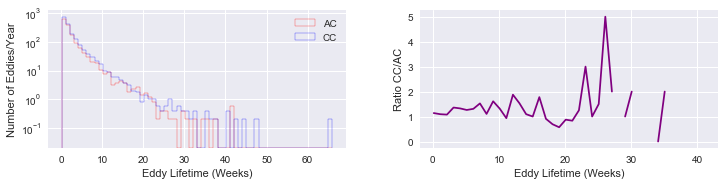

In [203]:
#testing graphs
plt.figure(figsize=(12,12))
gs=gridspec.GridSpec(4,2)
gs.update(wspace=.25,hspace=.25)

ax1 = plt.subplot(gs[0,0])
ns, bins, patches = ax1.hist(x1,
                      histtype='step',
                      bins=int(max(max(x1[0]),max(x1[1]))),
                      color=['b','r'],
                      label=['CC','AC'],
                      log=True,
                      weights=[weight_c,weight_a]
                      )
ax1.legend()

ax2=plt.subplot(gs[0,1])
ax2.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax1.set_xlabel(x1lab[0])
ax1.set_ylabel(x1lab[1])
ax2.set_xlabel(x1lab[0])
ax2.set_ylabel(x1lab[2])

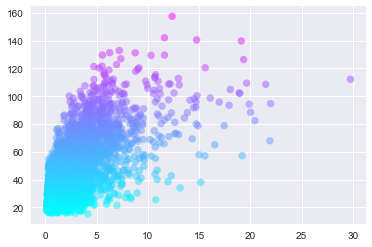

In [204]:
#test graph
plt.scatter(c_agg['amplitude'],c_agg['radius'],c=c_agg['radius'],cmap='cool',alpha=.5)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide


<function matplotlib.pyplot.show>

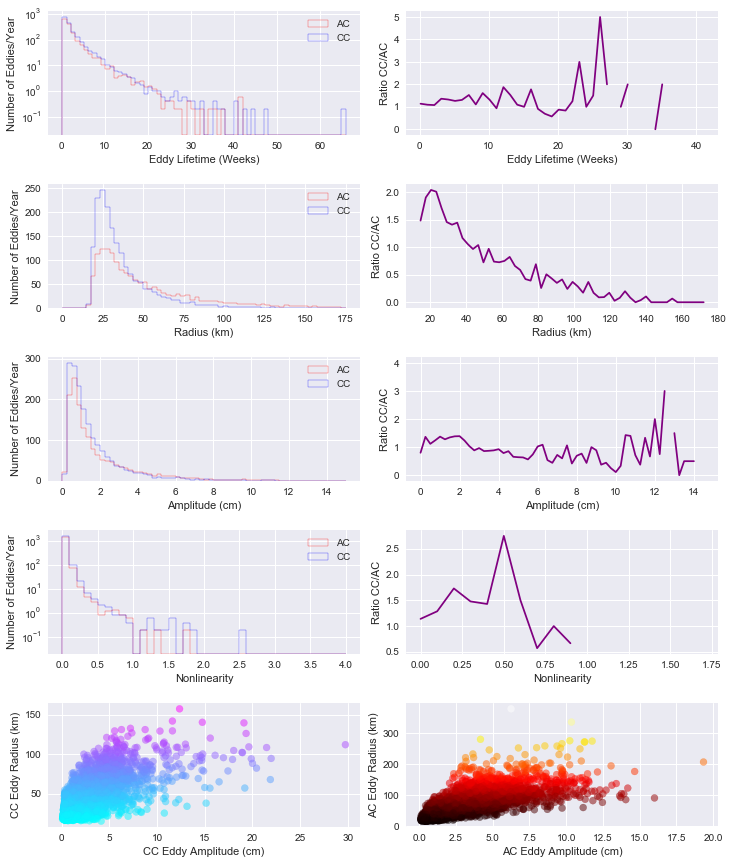

In [211]:
plt.figure(figsize=(12,15))
gs=gridspec.GridSpec(5,2)
gs.update(wspace=.15,hspace=.4)

#Lifetime
ax1 = plt.subplot(gs[0,0])
ns, bins, patches = ax1.hist(x1,
                      histtype='step',
                      bins=int(max(max(x1[0]),max(x1[1]))),
                      color=['b','r'],
                      label=['CC','AC'],
                      log=True,
                      weights=[weight_c,weight_a]
                      )
ax1.legend()

ax2=plt.subplot(gs[0,1])
ax2.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax1.set_xlabel(x1lab[0])
ax1.set_ylabel(x1lab[1])
ax2.set_xlabel(x1lab[0])
ax2.set_ylabel(x1lab[2])

#Radius
ax3 = plt.subplot(gs[1,0])
ns, bins, patches = ax3.hist(x2,
                      histtype='step',
#                       bins=int(max(max(x2[0]),max(x2[1]))),
                      bins=60,
                      range=[0,175], #through observation
                      color=['b','r'],
                      label=['CC','AC'],
                      log=False,
                      weights=[weight_c,weight_a]
                      )
ax3.legend()

ax4=plt.subplot(gs[1,1])
ax4.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax3.set_xlabel(x2lab[0])
ax3.set_ylabel(x2lab[1])
ax4.set_xlabel(x2lab[0])
ax4.set_ylabel(x2lab[2])

#Amplitude
ax5 = plt.subplot(gs[2,0])
ns, bins, patches = ax5.hist(x3,
                      histtype='step',
#                       bins=int(max(max(x3[0]),max(x3[1]))),
                      bins=60,
                      color=['b','r'],
                      label=['CC','AC'],
                      range=[0,15], #through observation
                      log=False,
                      weights=[weight_c,weight_a]
                      )
ax5.legend()

ax6=plt.subplot(gs[2,1])
ax6.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax5.set_xlabel(x3lab[0])
ax5.set_ylabel(x3lab[1])
ax6.set_xlabel(x3lab[0])
ax6.set_ylabel(x3lab[2])

#Nonlinearity
ax7 = plt.subplot(gs[3,0])
ns, bins, patches = ax7.hist(x4,
                      histtype='step',
#                       bins=int(max(max(x4[0]),max(x4[1]))),
                      bins=40,
                      color=['b','r'],
                      label=['CC','AC'],
                      range=[0,4], #through observation
                      log=True,
                      weights=[weight_nl_c,weight_nl_a]
                      )
ax7.legend()

ax8=plt.subplot(gs[3,1])
ax8.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax7.set_xlabel(x4lab[0])
ax7.set_ylabel(x4lab[1])
ax8.set_xlabel(x4lab[0])
ax8.set_ylabel(x4lab[2])

#Amplitude vs Radius

ax9=plt.subplot(gs[4,0])
ax9.scatter(c_agg['amplitude'],c_agg['radius'],c=c_agg['radius'],cmap='cool',alpha=.5)
ax9.set_xlabel('CC Eddy Amplitude (cm)')
ax9.set_ylabel('CC Eddy Radius (km)')

ax10=plt.subplot(gs[4,1])
ax10.scatter(a_agg['amplitude'],a_agg['radius'],c=a_agg['radius'],cmap='hot',alpha=.5)
ax10.set_xlabel('AC Eddy Amplitude (cm)')
ax10.set_ylabel('AC Eddy Radius (km)')

plt.savefig('viz6.png')
plt.show

In [206]:
cdf['date']=pd.to_datetime(cdf['date'])

cdf['month_year'] = cdf.date.dt.to_period('M')

 #making a copy of eddy column to convert to 
cdfnew = cdf.groupby(['date'])

#grouping eddies by date to get a count
cdf2 = cdfnew.agg({
        'eddy':'count',
        'month_year':'first',
        'date':'first'
    })


cdf2['std']=cdf2['eddy'] #creating a standard deviation column when grouping

#grouping eddies by month-year pair
cdf2new = cdf2.groupby(['month_year'])
cdfmy = cdf2new.agg({
    'eddy':np.mean,
    'std':np.std,
    'date':'first'
})
cdfmy

,eddy,std,date
month_year,,,
2009-05,93.967742,4.191132,2009-05-01 12:00:00
2009-06,96.766667,6.398725,2009-06-01 12:00:00
2009-07,85.774194,6.211332,2009-07-01 12:00:00
2009-08,87.032258,5.029804,2009-08-01 12:00:00
2009-09,92.900000,4.611455,2009-09-01 12:00:00
2009-10,87.000000,4.568005,2009-10-01 12:00:00
2009-11,80.633333,4.582450,2009-11-01 12:00:00
2009-12,85.548387,6.597165,2009-12-01 12:00:00
2010-01,80.419355,4.056059,2010-01-01 12:00:00


In [207]:
adf['date']=pd.to_datetime(adf['date'])

adf['month_year'] = adf.date.dt.to_period('M')

 #making a copy of eddy column to convert to 
adfnew = adf.groupby(['date'])

#grouping eddies by date to get a count
adf2 = adfnew.agg({
        'eddy':'count',
        'month_year':'first',
        'date':'first'
    })


adf2['std']=adf2['eddy'] #creating a standard deviation column when grouping

#grouping eddies by month-year pair
adf2new = adf2.groupby(['month_year'])
adfmy = adf2new.agg({
    'eddy':np.mean,
    'std':np.std,
    'date':'first'
})
adfmy

,eddy,std,date
month_year,,,
2009-05,79.290323,7.303851,2009-05-01 12:00:00
2009-06,75.733333,5.717085,2009-06-01 12:00:00
2009-07,72.645161,3.937414,2009-07-01 12:00:00
2009-08,60.451613,6.474765,2009-08-01 12:00:00
2009-09,68.266667,5.674707,2009-09-01 12:00:00
2009-10,66.161290,5.125731,2009-10-01 12:00:00
2009-11,62.433333,6.780720,2009-11-01 12:00:00
2009-12,69.967742,5.552680,2009-12-01 12:00:00
2010-01,74.387097,7.994487,2010-01-01 12:00:00


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide


<function matplotlib.pyplot.show>

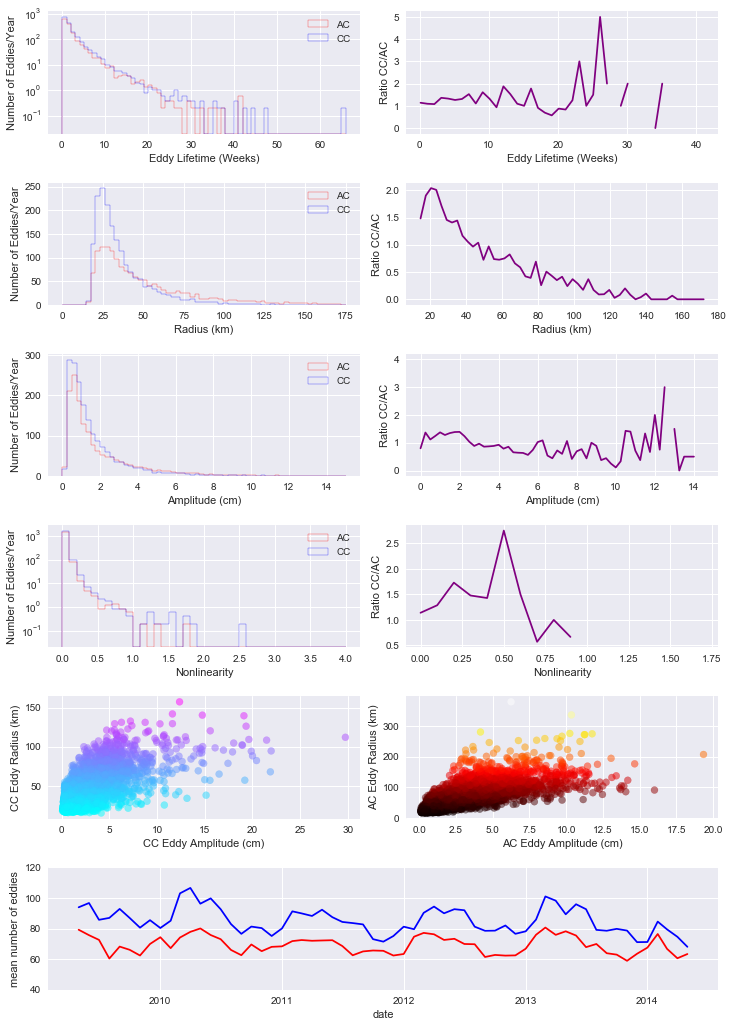

In [208]:
plt.figure(figsize=(12,18))
gs=gridspec.GridSpec(6,2)
gs.update(wspace=.15,hspace=.4)

#Lifetime
ax1 = plt.subplot(gs[0,0])
ns, bins, patches = ax1.hist(x1,
                      histtype='step',
                      bins=int(max(max(x1[0]),max(x1[1]))),
                      color=['b','r'],
                      label=['CC','AC'],
                      log=True,
                      weights=[weight_c,weight_a]
                      )
ax1.legend()

ax2=plt.subplot(gs[0,1])
ax2.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax1.set_xlabel(x1lab[0])
ax1.set_ylabel(x1lab[1])
ax2.set_xlabel(x1lab[0])
ax2.set_ylabel(x1lab[2])

#Radius
ax3 = plt.subplot(gs[1,0])
ns, bins, patches = ax3.hist(x2,
                      histtype='step',
#                       bins=int(max(max(x2[0]),max(x2[1]))),
                      bins=60,
                      range=[0,175], #through observation
                      color=['b','r'],
                      label=['CC','AC'],
                      log=False,
                      weights=[weight_c,weight_a]
                      )
ax3.legend()

ax4=plt.subplot(gs[1,1])
ax4.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax3.set_xlabel(x2lab[0])
ax3.set_ylabel(x2lab[1])
ax4.set_xlabel(x2lab[0])
ax4.set_ylabel(x2lab[2])

#Amplitude
ax5 = plt.subplot(gs[2,0])
ns, bins, patches = ax5.hist(x3,
                      histtype='step',
#                       bins=int(max(max(x3[0]),max(x3[1]))),
                      bins=60,
                      color=['b','r'],
                      label=['CC','AC'],
                      range=[0,15], #through observation
                      log=False,
                      weights=[weight_c,weight_a]
                      )
ax5.legend()

ax6=plt.subplot(gs[2,1])
ax6.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax5.set_xlabel(x3lab[0])
ax5.set_ylabel(x3lab[1])
ax6.set_xlabel(x3lab[0])
ax6.set_ylabel(x3lab[2])

#Nonlinearity
ax7 = plt.subplot(gs[3,0])
ns, bins, patches = ax7.hist(x4,
                      histtype='step',
#                       bins=int(max(max(x4[0]),max(x4[1]))),
                      bins=40,
                      color=['b','r'],
                      label=['CC','AC'],
                      range=[0,4], #through observation
                      log=True,
                      weights=[weight_nl_c,weight_nl_a]
                      )
ax7.legend()

ax8=plt.subplot(gs[3,1])
ax8.plot(bins[:-1],
        ns[0] / ns[1],
        color='purple')
ax7.set_xlabel(x4lab[0])
ax7.set_ylabel(x4lab[1])
ax8.set_xlabel(x4lab[0])
ax8.set_ylabel(x4lab[2])

#Amplitude vs Radius

ax9=plt.subplot(gs[4,0])
ax9.scatter(c_agg['amplitude'],c_agg['radius'],c=c_agg['radius'],cmap='cool',alpha=.5)
ax9.set_xlabel('CC Eddy Amplitude (cm)')
ax9.set_ylabel('CC Eddy Radius (km)')

ax10=plt.subplot(gs[4,1])
ax10.scatter(a_agg['amplitude'],a_agg['radius'],c=a_agg['radius'],cmap='hot',alpha=.5)
ax10.set_xlabel('AC Eddy Amplitude (cm)')
ax10.set_ylabel('AC Eddy Radius (km)')

#plotting final graph
ax11=plt.subplot(gs[5,:])

cdfmy['upp']=cdfmy['eddy']+cdfmy['std']
cdfmy['low']=cdfmy['eddy']-cdfmy['std']
adfmy['upp']=adfmy['eddy']+adfmy['std']
adfmy['low']=adfmy['eddy']-adfmy['std']

cdfmy['date'] = pd.to_datetime(cdfmy['date'])
adfmy['date'] = pd.to_datetime(adfmy['date'])

ax11.set_xlabel('date')
ax11.set_ylabel('mean number of eddies')
ax11.set_ylim(40,120)
ax11.plot(cdfmy['date'],cdfmy.eddy, c='blue')
# ax11.fill_between(cdfmy['date'],cdfmy['low'],cdfmy['upp'],color='lightskyblue', alpha = .3)
ax11.plot(cdfmy['date'],adfmy.eddy, c='red')
# ax11.fill_between(adfmy['date'],adfmy['low'],adfmy['upp'],color='indianred', alpha = .3)

plt.savefig('viz6full.png')
plt.show

In [214]:
cdfmy.to_csv('./data/cdfmy.csv')
adfmy.to_csv('./data/adfmy.csv')

In [215]:
cdfmy['std']

month_year
2009-05    4.191132
2009-06    6.398725
2009-07    6.211332
2009-08    5.029804
2009-09    4.611455
2009-10    4.568005
2009-11    4.582450
2009-12    6.597165
2010-01    4.056059
2010-02    4.853815
2010-03    5.962968
2010-04    6.277949
2010-05    4.901613
2010-06    3.680330
2010-07    5.928426
2010-08    2.762654
2010-09    3.460118
2010-10    3.291893
2010-11    2.399473
2010-12    3.824651
2011-01    4.259083
2011-02    6.176740
2011-03    5.224837
2011-04    6.352572
2011-05    3.693936
2011-06    3.928236
2011-07    5.090366
2011-08    3.979517
2011-09    4.896750
2011-10    5.451250
             ...   
2011-12    2.464370
2012-01    4.306534
2012-02    4.523066
2012-03    6.390349
2012-04    5.276384
2012-05    5.935677
2012-06    4.401672
2012-07    5.419003
2012-08    4.443674
2012-09    3.212046
2012-10    4.259840
2012-11    4.160018
2012-12    4.889972
2013-01    5.428123
2013-02    4.479820
2013-03    5.221338
2013-04    4.647209
2013-05    2.691684
2013-06  

In [213]:
adfmy['std']

month_year
2009-05    7.303851
2009-06    5.717085
2009-07    3.937414
2009-08    6.474765
2009-09    5.674707
2009-10    5.125731
2009-11    6.780720
2009-12    5.552680
2010-01    7.994487
2010-02    7.219444
2010-03    6.615232
2010-04    4.088251
2010-05    6.525549
2010-06    3.723952
2010-07    5.861484
2010-08    7.325460
2010-09    3.586212
2010-10    5.263385
2010-11    4.025208
2010-12    5.527838
2011-01    8.917302
2011-02    6.731431
2011-03    7.982642
2011-04    7.422860
2011-05    4.973046
2011-06    3.500575
2011-07    7.296928
2011-08    4.537064
2011-09    5.466828
2011-10    4.018238
             ...   
2011-12    4.917819
2012-01    3.442617
2012-02    9.117865
2012-03    5.420392
2012-04    6.868971
2012-05    6.080995
2012-06    3.681111
2012-07    7.436325
2012-08    4.847125
2012-09    4.108304
2012-10    4.512349
2012-11    7.068548
2012-12    5.265428
2013-01    5.445132
2013-02    5.436502
2013-03    6.507399
2013-04    8.885996
2013-05    5.144367
2013-06  

In [216]:
cdfmy.describe()

,eddy,std,upp,low
count,61.000000,61.000000,61.000000,61.000000
mean,85.174494,4.672252,89.846747,80.502242
std,8.576888,1.236051,9.081768,8.228193
min,68.120000,1.728730,72.414570,63.825430
25%,79.193548,3.979517,83.686187,74.751189
50%,84.387097,4.611455,89.477463,79.296731
75%,92.032258,5.451250,97.135005,86.613255
max,106.633333,7.076692,112.911282,100.355384


In [217]:
adfmy.describe()

,eddy,std,upp,low
count,61.000000,61.000000,61.000000,61.000000
mean,69.361345,5.766064,75.127408,63.595281
std,5.734228,1.634575,6.431174,5.454026
min,58.966667,3.341656,63.039142,53.976848
25%,63.933333,4.512349,69.435214,59.633172
50%,68.612903,5.527838,74.908547,62.568937
75%,74.193548,6.868971,80.531030,67.285019
max,80.709677,9.441830,87.217076,74.202279
